In [1]:
from arbol import *
from base import *

# GraficadorArbol().test()

# iris = load_iris(as_frame=True)
# plt.plot(iris)

# print(iris.data)

1. Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [2]:
def ejercicio_uno(df_train, df_test):
  arbol = Arbol()
  clf = arbol.entrenar(df_train)
  df = arbol.predecir(df_test, clf)
  GraficadorDF(df).graph_puntos()

In [3]:
radio = 1
df_test = GeneradorDFEspiral(radio=radio, n=10000).generar_puntos_curva()

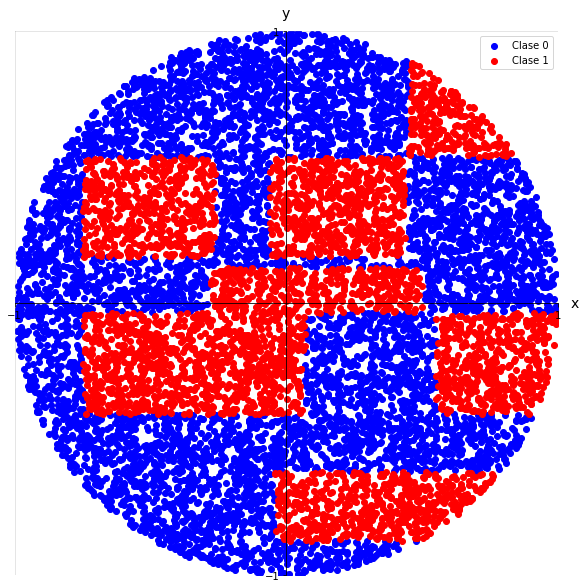

In [4]:
df_training_1 = GeneradorDFEspiral(radio=radio, n=150).generar_puntos_curva()
ejercicio_uno(df_training_1, df_test)

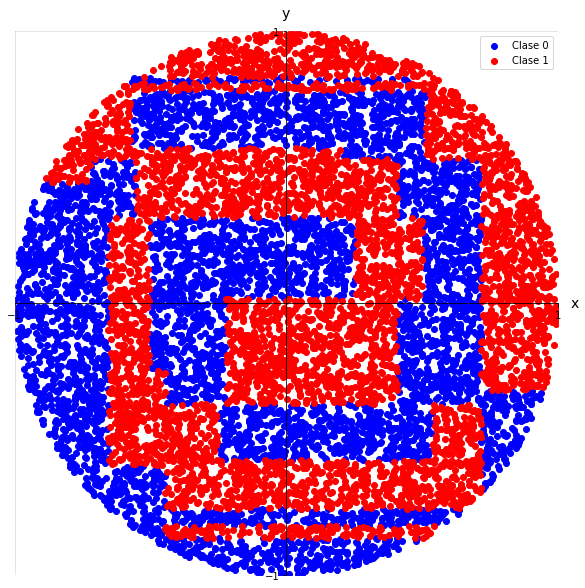

In [5]:
df_training_2 = GeneradorDFEspiral(radio=radio, n=600).generar_puntos_curva()
ejercicio_uno(df_training_2, df_test)

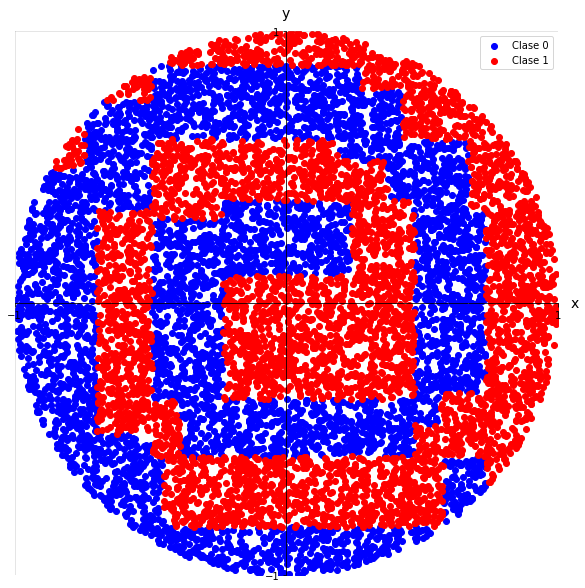

In [6]:
df_training_3 = GeneradorDFEspiral(radio=radio, n=3000).generar_puntos_curva()
ejercicio_uno(df_training_3, df_test)

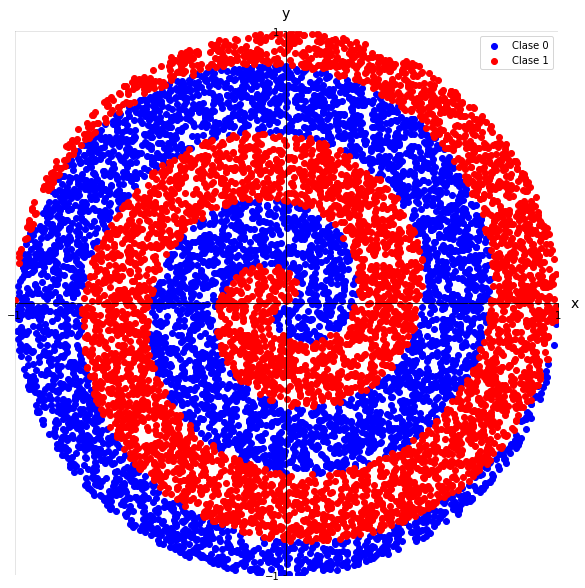

In [7]:
GraficadorDF(df_test).graph_puntos()

Las tres espirales obtenidas en la predicción muestran que sus puntos se clasifican de forma incorrecta, siendo la primera (n=150) la más diferente a la espiral esperada y la tercera (n=3000) la más semejante. Para reducir este error, es necesario contar con un conjunto de entrenamiento más grande.

---